**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! Excellent work! There is a nice data analysis, you cleaned up the data pretty thoroughly before jumping into modeling, and data quality is the most important thing for good models :) The project is accepted. Keep up the good work on the next sprint!

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor, early_stopping
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
try:
    df = pd.read_csv('car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')

General info on our dataset.

In [3]:
df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
222397,09/03/2016 02:57,4750,NaN,2018,manual,0,polo,150000,12,gasoline,volkswagen,no,09/03/2016 00:00,0,24944,07/04/2016 06:45
38670,01/04/2016 20:06,1190,sedan,1997,manual,60,golf,125000,7,petrol,volkswagen,no,01/04/2016 00:00,0,61462,03/04/2016 10:35
228783,08/03/2016 14:53,1000,wagon,1998,manual,0,astra,150000,0,petrol,opel,NaN,08/03/2016 00:00,0,32547,06/04/2016 03:44
172440,19/03/2016 21:37,1999,NaN,1997,manual,110,golf,150000,7,NaN,volkswagen,no,19/03/2016 00:00,0,54531,01/04/2016 15:16
171031,02/04/2016 04:36,1200,NaN,2018,auto,170,stilo,150000,1,petrol,fiat,NaN,02/04/2016 00:00,0,77883,04/04/2016 05:52


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DateCrawled,354369,15470,05/03/2016 14:25,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,354369.0,NaN,NaN,NaN,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
VehicleType,316879,8,sedan,91457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegistrationYear,354369.0,NaN,NaN,NaN,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Gearbox,334536,2,manual,268251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,354369.0,NaN,NaN,NaN,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Model,334664,250,golf,29232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,354369.0,NaN,NaN,NaN,128211.172535,37905.34153,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,NaN,NaN,NaN,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
FuelType,321474,7,petrol,216352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Rename columns for easier coding.

In [6]:
col_dict = {column: ''.join('_' + char if char.isupper() else char.strip() for char in column).strip('_').lower() 
          for column in df.columns}
df = df.rename(col_dict, axis=1)

Check for duplicates.

In [7]:
df.duplicated().sum()

262

Drop duplicates.

In [8]:
df = df.drop_duplicates()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, duplicates were dropped!

</div>

Check for missing values.

In [9]:
len(df.dropna())/len(df)

0.6934824784599005

There are a lot of missing values. We should change `not_repaired` from "yes"\"no" to 0/1, and fill the missing values with 0 because it is  by far the most common case. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, that makes sense

</div>

In [10]:
df['not_repaired'] = df['not_repaired'].replace({'no': 0, 'yes':1}).fillna(0).astype('int')

Also, we can drop `number_of_pictures` completely because it is just a list of zeros.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right!

</div>

In [11]:
try:
    df = df.drop('number_of_pictures', axis=1)
except:
    pass

Using car model to infer horsepower, vehicle type and gearbox.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very nice!

</div>

In [12]:
columns_to_fill = ['vehicle_type', 'fuel_type', 'gearbox']
fill_key_grouped = df.groupby(['brand', 'model'], as_index=False)[columns_to_fill].agg(pd.Series.mode)
fill_key = df.merge(fill_key_grouped, how='left', on=['brand', 'model'], suffixes=('_old', ''))[columns_to_fill]


In [13]:
df = df.fillna({'vehicle_type': fill_key['vehicle_type'], 'fuel_type': fill_key['fuel_type'], 'gearbox': fill_key['gearbox']})

Re-check for missing values.

In [14]:
len(df.dropna())/len(df)

0.9368157082463775

We improved from 69.3% valid items to 93.7%. Now it's ok to drop the invalid items.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

In [15]:
df = df.dropna()

Check for outliers in numeric data.

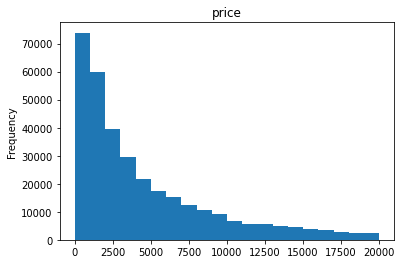

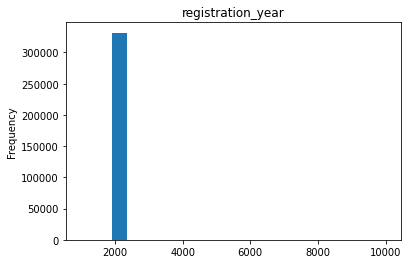

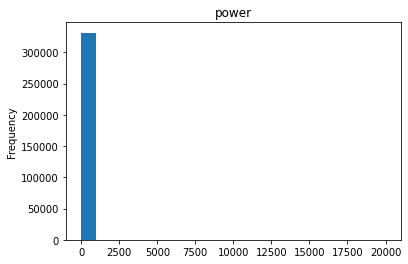

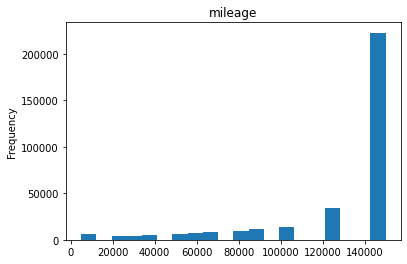

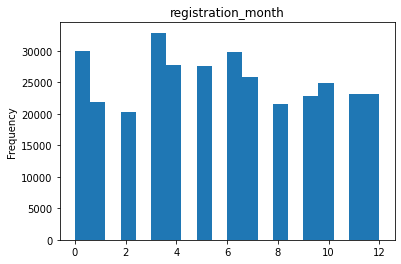

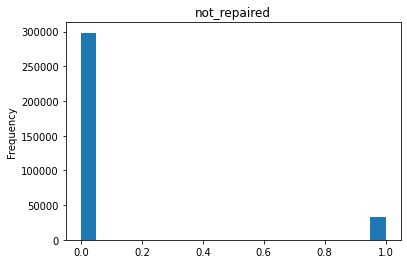

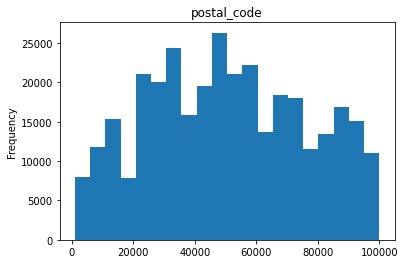

In [16]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', title=col, bins=20)
        plt.show()

There are outliers in two features, `power` and `registration_year`. First we look at `power`.

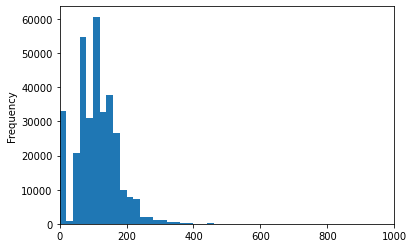

In [17]:
df['power'].plot(kind='hist', bins=1000, xlim=(0, 1000))
plt.show()

Highest realistic value.

In [18]:
hp_upper_limit = df['power'].quantile(0.999)
hp_upper_limit

600.0

Value to replace zeros, assuming the most common value except 0.

In [19]:
try:
    hp_mode = df['power'].value_counts().drop(0).index[0]
except:
    hp_mode = df['power'].value_counts().index[0]
hp_mode

75

Outlier rectification.

In [20]:
df.loc[df['power'] == 0, 'power'] = hp_mode.astype('int')
df.loc[df['power'] > hp_upper_limit, 'power'] = hp_upper_limit.astype('int')

`registration_year` requires similar treatment.

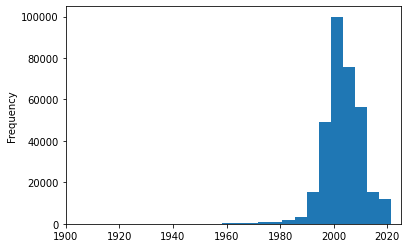

In [21]:
df['registration_year'].plot(kind='hist', bins=2000, xlim=(1900, 2025))
plt.show()

Range of realistic values.

In [22]:
year_upper_limit = df['registration_year'].quantile(0.999)
year_lower_limit = df['registration_year'].quantile(0.0001)
print(f'{year_lower_limit:n}-{year_upper_limit:n}')

1910-2018


Outlier rectification.

In [23]:
df.loc[df['registration_year'] < year_lower_limit, 'registration_year'] = year_lower_limit.astype('int')
df.loc[df['registration_year'] > year_upper_limit, 'registration_year'] = year_upper_limit.astype('int')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you studied the data ranges and fixed weird values

</div>

Make a numeric feature out of `gearbox`.

In [24]:
df['is_manual'] = (df['gearbox'] == 'manual').astype('int')

In [25]:
feature_col = ['vehicle_type', 'registration_year', 'power', 'model', 'mileage', 
               'registration_month', 'fuel_type', 'not_repaired', 'is_manual']
cat_col = [col for col in feature_col if pd.api.types.is_object_dtype(df[col])]
target_col = 'price'

x = df[feature_col]
y = df[target_col].values

x[cat_col] = x[cat_col].astype(str)
x = pd.get_dummies(x, columns=cat_col, drop_first=True)

transformer = Normalizer()
x = transformer.fit_transform(x)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train, validation and test sets. Categorical features were encoded

</div>

## Model training

Find the RMSE of a linear regression model to be used as a benchmark.

In [27]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [28]:
mean_squared_error(y_test, lr_model.predict(x_test), squared=False)

4096.114042419645

Hyperparameter tuning for a random forest without boosting.

In [29]:
%%time
best_rf = {'score': 9999}

for trees in range(100, 300+1, 100):
    curr = {'trees': trees}
    for depth in range(20, 60+1, 20):
        curr['depth'] = depth
        for min_samp in range(3, 3+1, 1):
            curr['min_samp'] = min_samp
            rf_model = RandomForestRegressor(random_state=42069, n_estimators=trees, 
                                             max_depth=depth, min_samples_leaf=min_samp, n_jobs=-1)
            rf_model.fit(x_train, y_train)
            curr['score'] = mean_squared_error(y_val, rf_model.predict(x_val), squared=False)
            print(curr)
            if curr['score'] < best_rf['score']:
                best_rf = curr

{'trees': 100, 'depth': 20, 'min_samp': 3, 'score': 1906.4828233631686}
{'trees': 100, 'depth': 40, 'min_samp': 3, 'score': 1849.777636272516}
{'trees': 100, 'depth': 60, 'min_samp': 3, 'score': 1849.7664611356413}
{'trees': 200, 'depth': 20, 'min_samp': 3, 'score': 1903.0379143532916}
{'trees': 200, 'depth': 40, 'min_samp': 3, 'score': 1846.1524862265098}
{'trees': 200, 'depth': 60, 'min_samp': 3, 'score': 1846.255915464598}


KeyboardInterrupt: 

Testing the optimal model.

In [34]:
%%time
rf_model = RandomForestRegressor(random_state=42069, n_estimators=best_rf['trees'], 
                                 max_depth=best_rf['depth'], min_samples_leaf=best_rf['min_samp'])
rf_model.fit(x_train, y_train)

CPU times: user 16min 56s, sys: 2.59 s, total: 16min 58s
Wall time: 16min 59s


RandomForestRegressor(max_depth=60, min_samples_leaf=3, n_estimators=200,
                      random_state=42069)

In [37]:
mean_squared_error(y_test, rf_model.predict(x_test), squared=False)

1847.1995269045747

The score is much better than the linear regression benchmark, but it took very long to train.

Next, we'll try LightGBM.

In [68]:
%%time
lgb1 = LGBMRegressor(random_state=0, learning_rate=0.25, n_estimators=1000)
lgb1.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x_val, y_val)], callbacks=[early_stopping(stopping_rounds=5)])

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[371]	valid_0's rmse: 1805.5	valid_0's l2: 3.25984e+06
CPU times: user 2min 3s, sys: 1.22 s, total: 2min 4s
Wall time: 2min 5s


LGBMRegressor(learning_rate=0.25, n_estimators=1000, random_state=0)

This is good and fast, but maybe we can do better with slower learning.

In [69]:
%%time
lgb2 = LGBMRegressor(random_state=0, learning_rate=0.1, n_estimators=1000)
lgb2.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x_val, y_val)], callbacks=[early_stopping(stopping_rounds=5)])

Training until validation scores don't improve for 5 rounds


KeyboardInterrupt: 

It is only slightly more accurate, but takes twice as much time. Next, try to simplify it with depth restriction.

In [40]:
%%time
lgb3 = LGBMRegressor(random_state=42069, learning_rate=0.1, n_estimators=1000, max_depth=10)
lgb3.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x_val, y_val)], callbacks=[early_stopping(stopping_rounds=5)])

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[799]	valid_0's rmse: 1820.24	valid_0's l2: 3.31328e+06
CPU times: user 1min 32s, sys: 373 ms, total: 1min 32s
Wall time: 1min 33s


LGBMRegressor(max_depth=10, n_estimators=1000, random_state=42069)

For the final test, we'll take the first version because it is the fastest and not significantly less accurate than the others.

In [70]:
%%time
mean_squared_error(y_test, lgb1.predict(x_test), squared=False)

CPU times: user 1.87 s, sys: 9.51 ms, total: 1.88 s
Wall time: 1.83 s


1809.690866636185

38$ better than the basic random forest at a fraction of the time. Next, try the same with CatBoost.

In [43]:
cat1 = CatBoostRegressor(random_state=42069, loss_function='RMSE', n_estimators=2000, learning_rate=0.25)

In [44]:
%%time
cat1.fit(
    x_train, y_train, 
    eval_set=[(x_val, y_val)], 
    use_best_model=True, 
    early_stopping_rounds=5,
    verbose=100,
)

0:	learn: 3934.0591890	test: 3940.7293743	best: 3940.7293743 (0)	total: 105ms	remaining: 3m 29s
100:	learn: 2079.0075333	test: 2097.7723173	best: 2097.7723173 (100)	total: 8.22s	remaining: 2m 34s
200:	learn: 1936.8581388	test: 1972.6061148	best: 1972.6061148 (200)	total: 15.6s	remaining: 2m 19s
300:	learn: 1861.7634626	test: 1915.5569446	best: 1915.5569446 (300)	total: 22.6s	remaining: 2m 7s
400:	learn: 1815.9699290	test: 1886.4337513	best: 1886.4337513 (400)	total: 29.6s	remaining: 1m 58s
500:	learn: 1779.5914807	test: 1867.1287300	best: 1867.1287300 (500)	total: 36.7s	remaining: 1m 49s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 1859.213817
bestIteration = 556

Shrink model to first 557 iterations.
CPU times: user 58.7 s, sys: 498 ms, total: 59.2 s
Wall time: 1min


Slower learning.

In [30]:
cat2 = CatBoostRegressor(random_state=42069, loss_function='RMSE', n_estimators=2000, learning_rate=0.1)

In [31]:
%%time
cat2.fit(
    x_train, y_train, 
    eval_set=[(x_val, y_val)], 
    use_best_model=True, 
    early_stopping_rounds=5,
    verbose=100,
)

0:	learn: 4293.9870128	test: 4284.4201028	best: 4284.4201028 (0)	total: 151ms	remaining: 5m
100:	learn: 2313.7777093	test: 2303.5782861	best: 2303.5782861 (100)	total: 7.67s	remaining: 2m 24s
200:	learn: 2136.9933355	test: 2132.8664953	best: 2132.8664953 (200)	total: 15.8s	remaining: 2m 21s
300:	learn: 2051.6414377	test: 2055.6808459	best: 2055.6808459 (300)	total: 23.2s	remaining: 2m 11s
400:	learn: 1991.3336522	test: 2003.6650810	best: 2003.6650810 (400)	total: 30.7s	remaining: 2m 2s
500:	learn: 1947.9364028	test: 1968.6816127	best: 1968.6816127 (500)	total: 37.9s	remaining: 1m 53s
600:	learn: 1914.0671912	test: 1941.3035683	best: 1941.3035683 (600)	total: 45s	remaining: 1m 44s
700:	learn: 1884.6305803	test: 1919.3655393	best: 1919.3655393 (700)	total: 52.2s	remaining: 1m 36s
800:	learn: 1860.8411625	test: 1903.1279934	best: 1903.1279934 (800)	total: 59.1s	remaining: 1m 28s
900:	learn: 1840.2230580	test: 1890.5755787	best: 1890.5755787 (900)	total: 1m 5s	remaining: 1m 19s
1000:	learn

Test score of the second Catboost model.

In [61]:
%%time
mean_squared_error(y_test, cat2.predict(x_test), squared=False)

CPU times: user 4.56 s, sys: 31.3 ms, total: 4.6 s
Wall time: 4.6 s


1855.7866063613908

<div class="alert alert-warning">
<b>Reviewer's comment</b>

For catboost and lightgbm using their own encoding for categorical features instead of OHE usually gives better results (both in terms of speed and quality). For both models you just need to specify the categorical features during model initialization (and for lightgbm we also need to pre-encode categorical features as integers, for example using OrdinalEncoder). More details can be found in the documentation of these libraries.

</div>

It is not as good as LightGBM's score or even the simple random forest model.

For last, XGBoost.

In [55]:
%%time
xgb1 = XGBRegressor(random_state=42069, n_estimators=300, learning_rate=0.5)
xgb1.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=3, verbose=False)
print(xgb1.best_iteration, xgb1.best_score)

152 1850.748901
CPU times: user 10min 7s, sys: 2.56 s, total: 10min 10s
Wall time: 10min 12s


Slower learning.

In [56]:
%%time
xgb2 = XGBRegressor(random_state=42069, n_estimators=300, learning_rate=.3)
xgb2.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=3, verbose=False)
print(xgb2.best_iteration, xgb2.best_score)

254 1820.817993
CPU times: user 17min 11s, sys: 4.24 s, total: 17min 15s
Wall time: 17min 19s


Deeper trees.

In [58]:
%%time
xgb3 = XGBRegressor(random_state=42069, n_estimators=300, learning_rate=.3, max_depth=10)
xgb3.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=3, verbose=False)
print(xgb2.best_iteration, xgb3.best_score)

254 1795.2948
CPU times: user 15min 27s, sys: 4.9 s, total: 15min 32s
Wall time: 15min 38s


Test score of the 3rd varietion.

In [60]:
%%time
mean_squared_error(y_test, xgb3.predict(x_test), squared=False)

CPU times: user 953 ms, sys: 1 µs, total: 953 ms
Wall time: 908 ms


1799.3781079941543

It is better than LightGBM, but it took much longer to train.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, you tried several models and tuned their hyperparameters using the validation set. Final models were evaluated on the test set. You also measured both training and prediction time

</div>

## Model analysis

In this project we tried out 3 gradient boost libraries on a regression task, and compared the results to the random forest from scikit-learn: LightGBM, CatBoost and XGBoost. Of the three, LightGBM stood out for training speed, while also improving on accuracy. With CatBoost, we didn't manage to reduce the loss function below the level set by the basic random forest. We might achieve better results with further tuning, but even as it is the training times are higher than LightGBM's for a lower accuracy. XGBoost did slightly improve on LightGBM's results, but took much longer to train. Overall, LightGBM showed the greatest time efficiency.

NOTE: Every time I trained the same models on jupyterhub I got vastly different running times, so it is possible, even likely, the differences I found are the result of when each part of the notebook was originally run. In other words, trying to compare the speed is pretty much pointless.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

> NOTE: Every time I trained the same models on jupyterhub I got vastly different running times, so it is possible, even likely, the differences I found are the result of when each part of the notebook was originally run. In other words, trying to compare the speed is pretty much pointless.
    
Yeah, the better way would probably be to use `%%timeit` instead of `%%time` to make several runs and measure mean running time and standard deviation, although that would take more time.

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed